# MNIST - Convolution Neural Net with Keras and Python

## About the Notebook

This project is a trail of working and playing with deep learning convolution neural networks for image recongition (Computer vision). Here we will be looking at the neural net model that could identify the handwritten digits (0 to 9).

## Importing the libraries

In [57]:
# Numpy
import numpy as np
# Keras Model Module
from keras.models import Sequential
# Keras core layers
from keras.layers import Dense, Dropout, Activation, Flatten
# Keras CNN Layers
from keras.layers import Convolution2D, MaxPooling2D
# Utilities Layers
from keras.utils import np_utils

## Loading the dataset

MNIST is one the best dataset that can be used to learn about deep learning. And for the purpose developing the neural networks system of the MVP, this can be used as a starting point or proof of concept. And if someone is joing the team this ipython notebook can be shared to make them under the starting piece of deep learning computer vision implementation. And the MNIST dataset by default is available in keras. For those who are coming from R background this is like the iris dataset in R.

In [58]:
# import the package mnist from keras
from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Since that we have loaded the dataset lets have a look at the shape of the dataset.

In [59]:
print(X_train.shape)

(60000, 28, 28)


So it's appear that there are 60,000 sample of images in the training set Each and every images are of size 28*28 pixels.

Let's confirm that we have the images intact by printing out the first image. In python, images are printed out using the package called matplotlib. So we will first import it and then using it we will print it out.

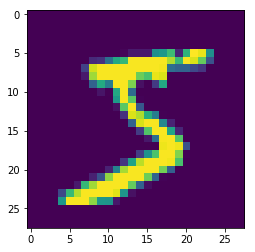

In [60]:
# import pyplot from matplotlib as plt
import matplotlib.pyplot as plt

# Print the first three images
plt.imshow(X_train[0])

It is always helpful when you are working with computer vision problem to plot the data before doing any algorithm work. It's a quick sanity check that can prevent easily avoidable mistakes such as misinterpreting the data dimensions.

## Pre-process the images for the CNN

Pre-processing the images depth for the purpose RGB channels.

In [61]:
# For tensorflow the ordering is (shape, cols, rows, depth)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# For theano ordering
# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

Just to get it verified whether it's worked correctly or not, we will print out the shape of the image. Although we have mentioned the pixels as hard coded it's better to have it as a dynamic value that got from the image. If the images are of different pixels notation then try running a loop for each and every images in the dataset.

In [62]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


So we can see that the dimensions have changed clearly and depth has been added to the shape notation of the data.

The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [63]:
# Converting to of type Float since on scaling from 
# 0 to 1 we might be looking at decimal values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Scaling it from 0 to 1
X_train /= 255
X_test /= 255

Thus all the pre-processing required for the image data is ready.

## Preprocess class labels for Keras

MNIST dataset have some mismatches with the class labels that we are looking at for the classifcation problem so we have handle this. This might vary from dataset to dataset. Let's look at the shape first.

In [64]:
print(y_train.shape)

(60000,)


This looks problematic. We should have got 10 labels one for each labels.  And what we have is 1D arrays. So we will the labels of first training samples now.

In [65]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


And there's the problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values. We can solve with few lines of manupulating code.

In [66]:
# Convert 1D to 10D class labels similar to converting to catergorical variable
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Now we can check the labels.

In [67]:
print(Y_train.shape)

(60000, 10)


## Define the Model Architecture

As we have crossed the so called 80% of work in Data science which is the Data Cleaning and Preparation, we are ready to make the magic of doing the computer vision by creating the neural net. First we have define the model before training the data. Keras and tensorflow has lots of support that it offers for this process. Let's start by declaring a sequential model format:

In [68]:
model = Sequential()

Next step is to define the input layer of the neural networks.

In [71]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

C:\ProgramData\Anaconda2\envs\keras\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


The input parameter is of the notation (depth, width, height) and this case we see that the depth is 1(2D image) and width and height is 28 pixels each. The first 3 parameters represent the number of convolution filters to use, the number of rows in each convolution kernel, and the number of columns in each convolution kernel, respectively.

We can confirm whether it has worked fine by printing the shape of the model.

In [72]:
print(model.output_shape)

(None, 24, 24, 32)


We can now add more layers of neurons.

In [73]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\ProgramData\Anaconda2\envs\keras\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


Now that we have all the basics setup, we will just make a fully connected dense layers.

In [74]:
# Fully connected dense layer of the net
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

And thus we have our convolution neural net that is up and ready to take it data to do the deep learning magic. Now we all need is to define the loss function and the optimizer and we ready to train the net with the data.

## Compile model

The hard part is all over and we just have few more simple steps away from our convolution net. We need to just complie the model and we are ready to train the data. And when we are compling the data we will do the optimizer and loss function of our net.

In [76]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Note that keras do have more loss and optimizer that is in tact with it.

## Fit the model on the train data

In [77]:
# Training the data
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

C:\ProgramData\Anaconda2\envs\keras\lib\site-packages\keras-2.0.4-py3.5.egg\keras\models.py:849: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\ProgramData\Anaconda2\envs\keras\lib\site-packages\keras-2.0.4-py3.5.egg\keras\backend\tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/10
60000/60000 [==============================] - 528s - loss: 0.2026 - acc: 0.9388   
Epoch 2/10
60000/60000 [==============================] - 506s - loss: 0.0860 - acc: 0.9753   
Epoch 3/10
60000/60000 [==============================] - 480s - loss: 0.0649 - acc: 0.9806   
Epoch 4/10
60000/60000 [==============================] - 865s - loss: 0.0535 - acc: 0.9840   
Epoch 5/10
60000/60000 [==============================] - 553s - loss: 0.0451 - acc: 0.9863   
Epoch 6/10
60000/60000 [==============================] - 507s - loss: 0.0390 - acc: 0.9883   
Epoch 7/10
60000/60000 [==============================] - 497s - loss: 0.0374 - acc: 0.9883   
Epoch 8/10
60000/60000 [==============================] - 494s - loss: 0.0341 - acc: 0.9894   
Epoch 9/10
60000/60000 [==============================] - 501s - loss: 0.0296 - acc: 0.9908   
Epoch 10/10
60000/60000 [==============================] - 1523s - loss: 0.0288 - acc: 0.9915  


You can also use a variety of callbacks to set early-stopping rules, save model weights along the way, or log the history of each training epoch.

## Evaluate model on test data

As we have trained the model. It is more important to validate it over the new data. For this purpose only we have already split the dataset into train and test. So we now use the test data to evaluate our model and see the metrics on this.

In [78]:
# Model evaluation
score = model.evaluate(X_test, Y_test, verbose=0)

C:\ProgramData\Anaconda2\envs\keras\lib\site-packages\keras-2.0.4-py3.5.egg\keras\backend\tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


As that we have the score of the test evaluation. We will just print it to see the model performance.

In [82]:
print("Accuracy is ", round(score[1], 2))
print("Error is ", round(score[0], 2))

Accuracy is  0.99
Error is  0.03


We have a 99% accuracy CNN that could perform well in identifying the handwritten digits.